# PCA (Análisis de componentes principales)

Es un metodo para para describir un conjunto de datos en términos de nuevas variables no correlacionadas.

PCA es una tecnica de extracción de caracteristicas, combina nuestras variables de una manera especifica para que se puedan eliminar las variables "menos importantes", la ventaja de PCA es que las "nuevas" variables son independientes una de la otra.

Estas nuevas variables independientes son una combinación de las variables que teniamos originalmente.

**WRAP UP:**
La idea de utilizar PCA es simple, reducir el número de variables mientras preservamos la mayor cantidad de información



1. Cuando queremos entrenar modelos de ML y tenemos datasets con muchos atributos. PCA nos ayuda a reducir la dimensionalidad de este DATASET. De 90 atributos, pasemos a 10 atributos que expliquen esos 90.
2. Con PCA evitamos reducir dimensionalidad y perder información relevante.
3. Permite representar variables muy relacionadas en un solo componente (por ejemplo, tipo de tarjeta, marca de tarjeta, monto gastado, etc...)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names = ['sepal length','sepal width','petal length','petal width','class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


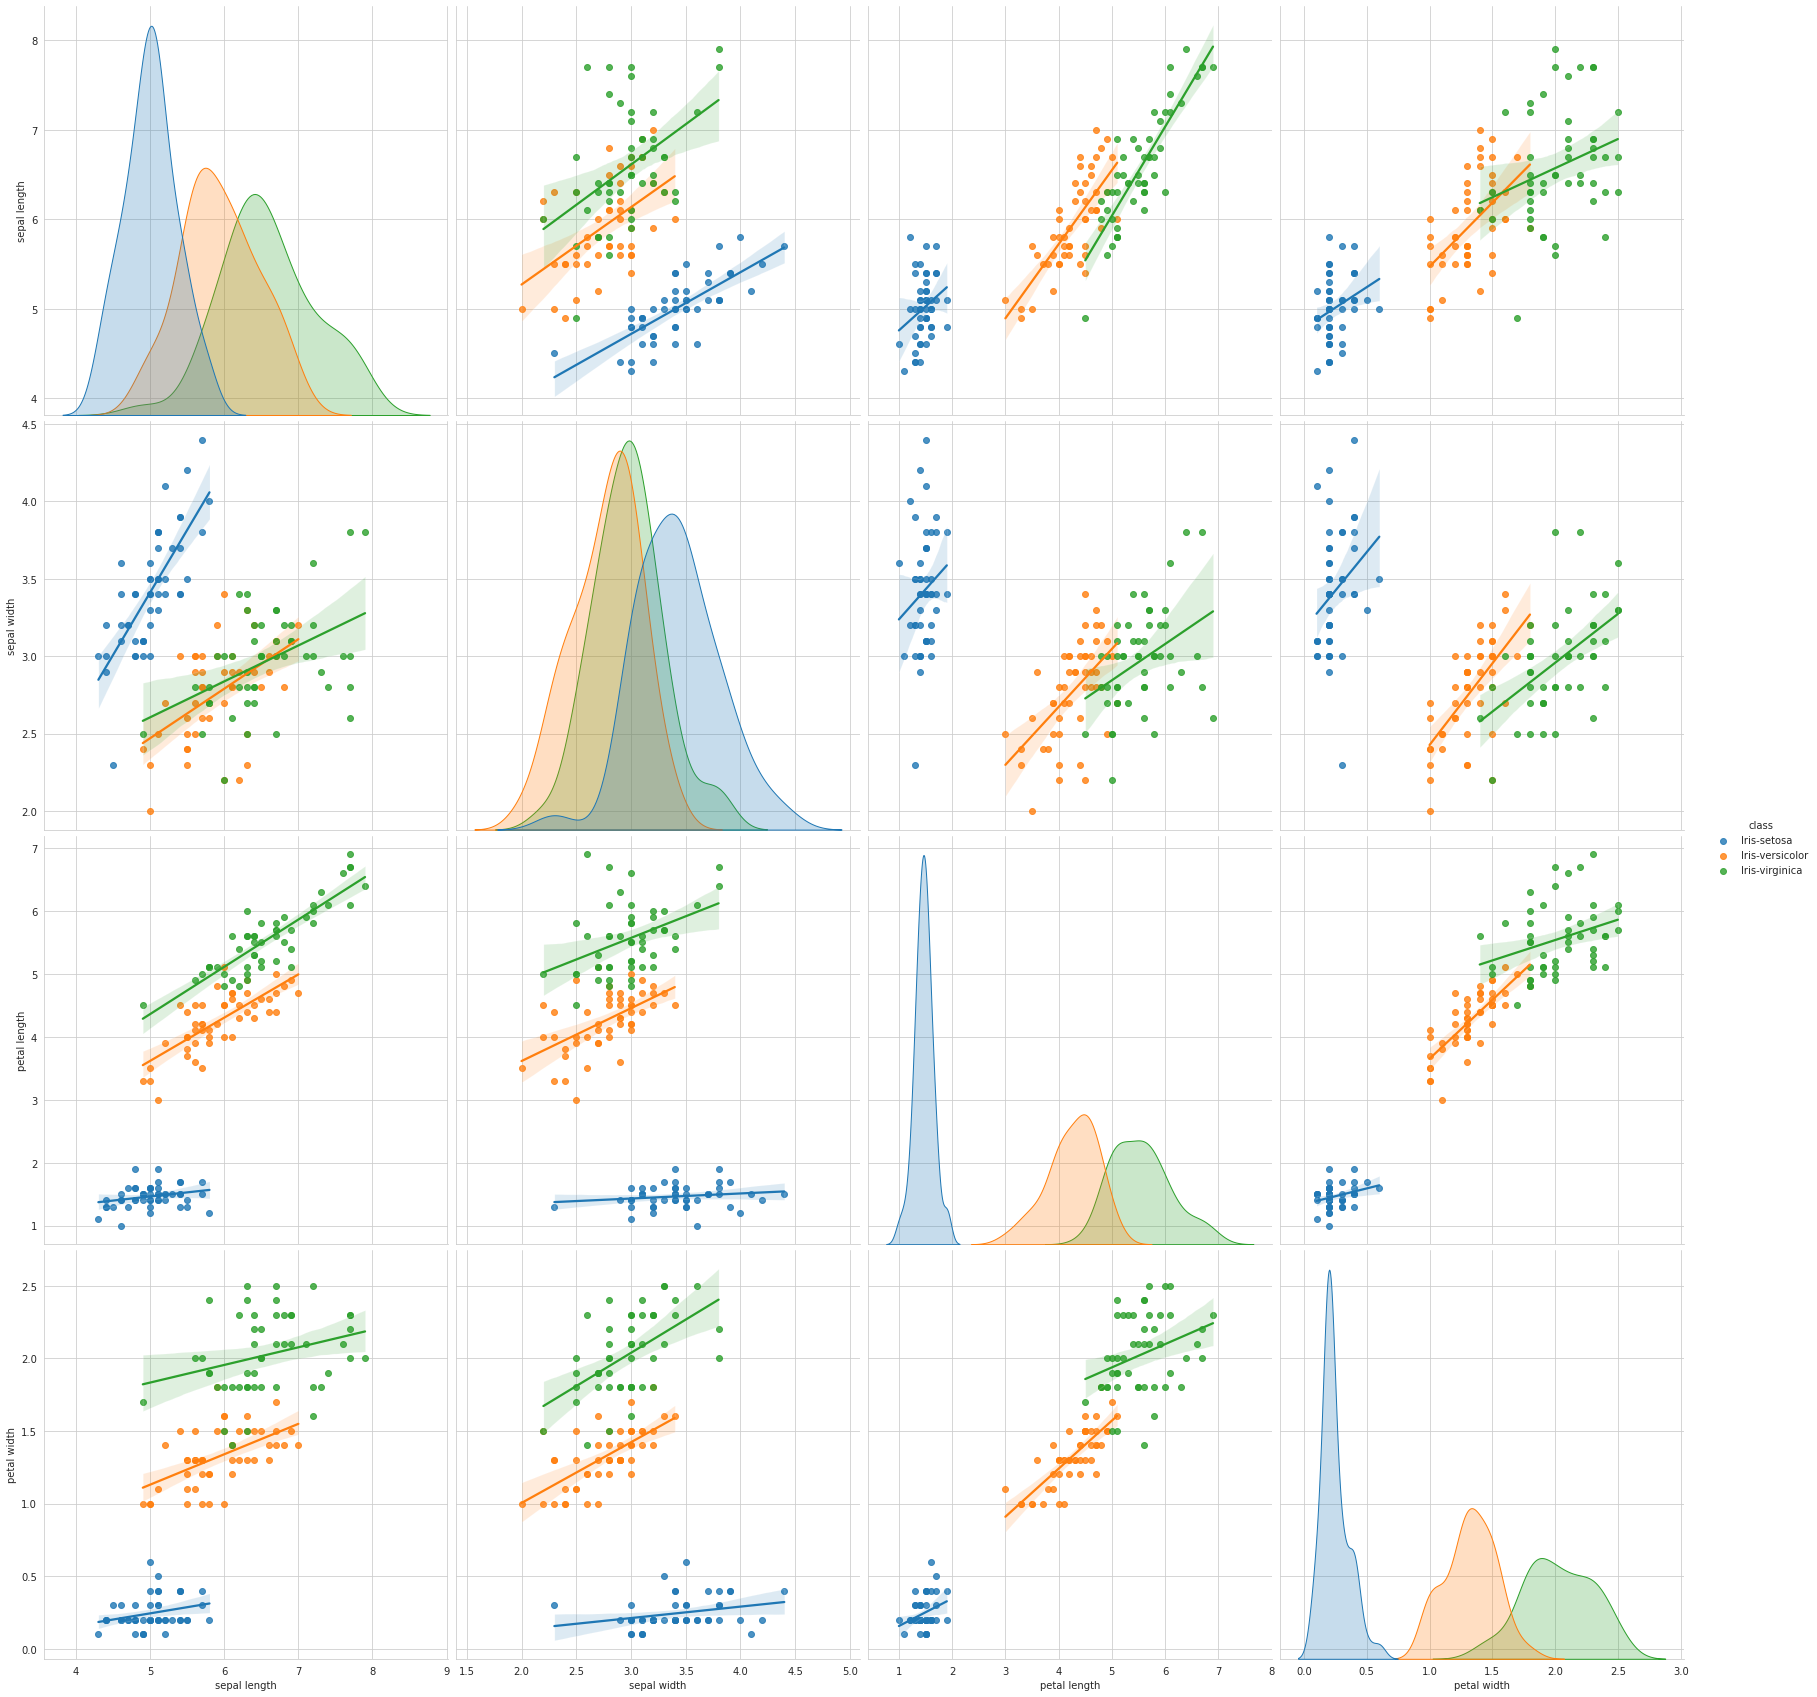

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(df, hue='class', size=6, kind='reg')

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length','sepal width','petal length','petal width']

x = df.loc[:,features].values
types = df['class']
# Media de 0. Varianza 1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


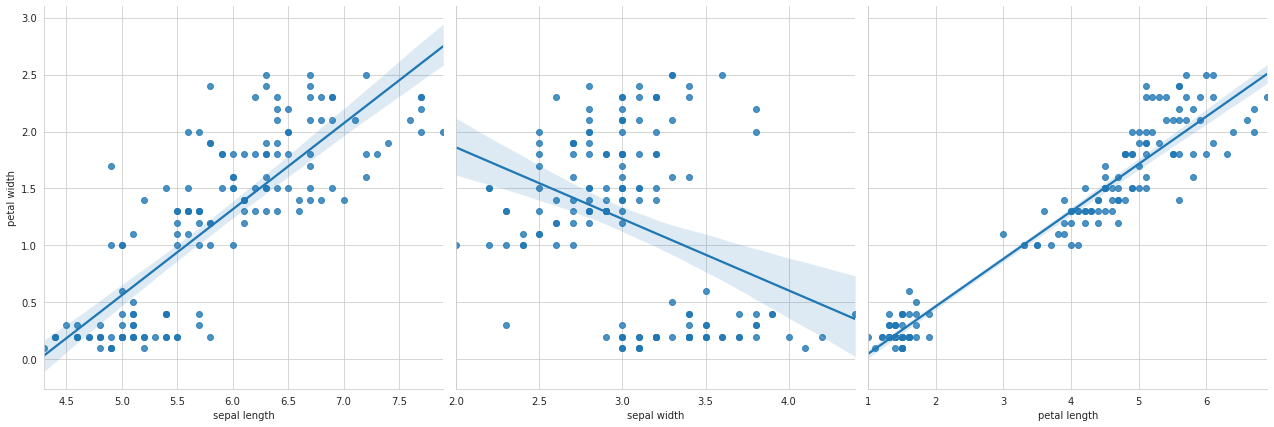

In [ ]:
sns.pairplot(df.loc[:"class"], x_vars = features[:-1], y_vars= features[-1], size=6, kind='reg')

In [ ]:
# Elimina la media, varianza de los datos es igual a 1
x = StandardScaler().fit_transform(x)
x[0:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

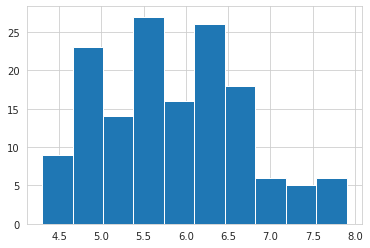

In [ ]:
plt.hist(df['sepal length'])

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([-1.4444497 , -1.12891457, -0.81337944, -0.49784431, -0.18230919,
         0.13322594,  0.44876107,  0.7642962 ,  1.07983133,  1.39536646,
         1.71090158]),
 <a list of 10 Patch objects>)

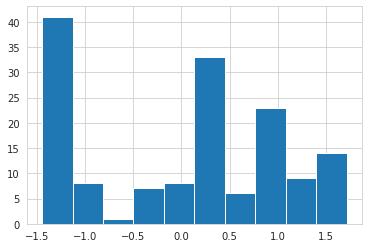

In [ ]:
plt.hist(x[:,3])

In [ ]:
x_norm = pd.DataFrame(x)
x_norm.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
x_norm.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(x)

In [ ]:
# Quedarnos con el # de componentes que explique el .8 de nuestra varainza
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = x_norm.columns.values,
                           index = ["Componente 1", "Componente 2"])
df_pca_comp

,0,1,2,3
Componente 1,0.522372,-0.263355,0.581254,0.565611
Componente 2,0.372318,0.925556,0.021095,0.065416


In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
df.head()

In [ ]:
df_comp = pd.DataFrame(data = principal_components, columns =["Componente 1", "Componente 2"])
df_comp.head()

,Componente 1,Componente 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


#Ejemplo

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ReynaldoMR3/clases_ih/main/segmentation%20data.csv", index_col=0)

In [ ]:
# Sex, 0 mujer, 1 hombre
# marital, 0 soltero, 1 no-soltero
# occupation 0 desempleado, 1 empleado, 2 director, 3 autoemplreado
# 0 otro o desconocido, 1 es prepa, 2 universidad, 3 Master
# settlement 0 ciudad chica, 1 ciudad mediana, 2 ciudad grande
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


## Heatmap bonito


In [ ]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
          corr['x'], corr['y'],
          color=corr['value'], color_range=[-1, 1],
          palette=sns.diverging_palette(20, 220, n=256),
          size=corr['value'].abs(), size_range=[0,1],
          marker=marker,
          x_order=data.columns,
          y_order=data.columns[::-1],
          size_scale=size_scale
      )

# codigo

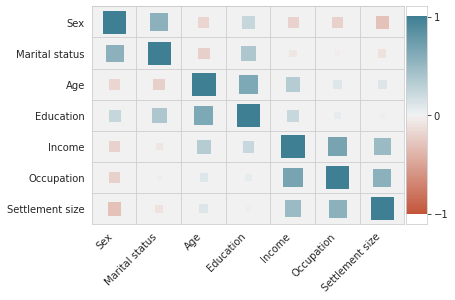

In [ ]:
corrplot(data.corr())

In [ ]:
sns.pairplot(data, hue='Sex',kind = 'reg')

In [ ]:
scaler = StandardScaler()
norm_data =  scaler.fit_transform(data)

In [ ]:
df_norm = pd.DataFrame(norm_data, index = data.index, columns = data.columns)
df_norm.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
100000002,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
100000003,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
100000004,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
100000005,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [ ]:
df_norm.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,3.554712e-15,5.950795e-16,1.180722e-16,-6.833423e-16,6.605827e-17,2.589706e-15,-4.455103e-15
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-9.173988e-01,-9.930243e-01,-1.528532e+00,-1.731068e+00,-2.234225e+00,-1.269525e+00,-9.097295e-01
25%,-9.173988e-01,-9.930243e-01,-7.603825e-01,-6.337243e-02,-6.113281e-01,-1.269525e+00,-9.097295e-01
50%,-9.173988e-01,-9.930243e-01,-2.482829e-01,-6.337243e-02,-1.418903e-01,2.968230e-01,3.212982e-01
75%,1.090038e+00,1.007025e+00,5.198664e-01,-6.337243e-02,4.492952e-01,2.968230e-01,3.212982e-01
max,1.090038e+00,1.007025e+00,3.421764e+00,3.272018e+00,4.945225e+00,1.863171e+00,1.552326e+00


In [ ]:
data.describe()

In [ ]:
pca = PCA()
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [ ]:
sum(pca.explained_variance_ratio_)

1.0

Text(0, 0.5, 'Varianza explicada acumulada')

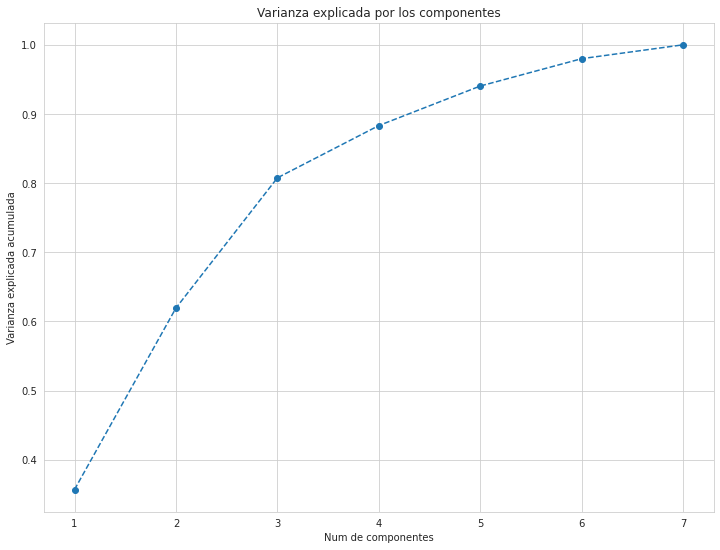

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle = '--')
plt.title("Varianza explicada por los componentes")
plt.xlabel("Num de componentes")
plt.ylabel("Varianza explicada acumulada")

In [ ]:
pca = PCA(n_components = 3)
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
df_transform = pca.transform(df_norm)

In [ ]:
df_norm.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
100000002,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
100000003,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
100000004,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
100000005,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [ ]:
# Se redujo nuestro dataset de 7 dimensiones a 3
data_pca = pd.DataFrame(df_transform, index = df_norm.index, columns =['C1','C2','C3'])
data_pca.head()

,C1,C2,C3
ID,,,
100000001,2.514746,0.834122,2.174806
100000002,0.344935,0.598146,-2.211603
100000003,-0.651063,-0.680093,2.280419
100000004,1.714316,-0.579927,0.730731
100000005,1.626745,-0.440496,1.244909


In [ ]:
pca.components_[0]

array([-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
        0.49205868,  0.46478852])

In [ ]:
df_pca_comp = pd.DataFrame( data = pca.components_,
                           columns = df_norm.columns.values,
                           index = ['C1','C2','C3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
C2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
C3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [ ]:
df_norm.head(1)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326


In [ ]:
data_pca.head(1)

,C1,C2,C3
ID,,,
100000001,2.514746,0.834122,2.174806


(-0.31469524)(-.917399)+(-0.19170439)(-0.993024)+....+(0.46478852)(1.552326)= 2.514746

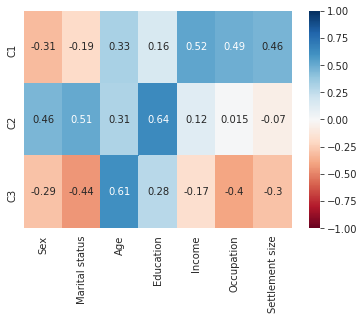

In [ ]:
sns.heatmap(df_pca_comp, vmin=-1, vmax=1,cmap='RdBu',annot=True)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
def plot_digits(data):
  fig,axes = plt.subplots(4,10,figsize=(10,4),
                          subplot_kw ={'xticks':[],'yticks':[]},
                          gridspec_kw = dict(hspace=.1, wspace=.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8,8),
              cmap='binary',interpolation='nearest')

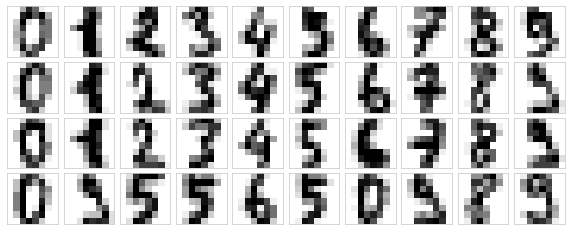

In [ ]:
plot_digits(digits.data)

In [ ]:
pca = PCA().fit(digits.data)
pca.n_components_

64

In [ ]:
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Text(0, 0.5, 'Varianza explicada acumulada')

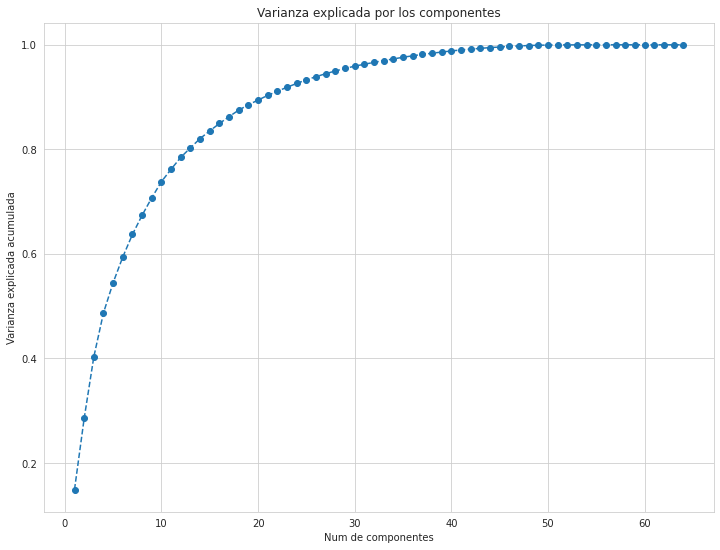

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,65),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle = '--')
plt.title("Varianza explicada por los componentes")
plt.xlabel("Num de componentes")
plt.ylabel("Varianza explicada acumulada")

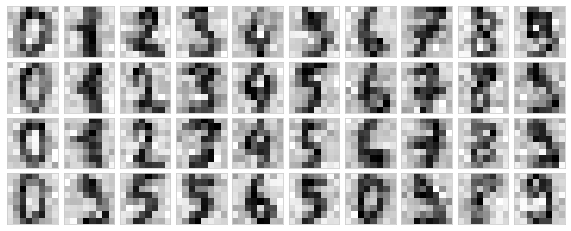

In [ ]:
np.random.seed= 42
noise = np.random.normal(digits.data,2)
plot_digits(noise)

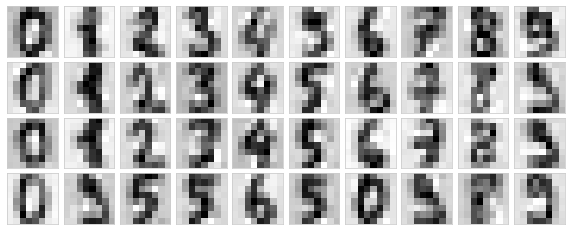

In [ ]:
# pca = PCA(n_components = 13)
pca = PCA(.8).fit(noise)
components=pca.transform(noise)
filtrado = pca.inverse_transform(components)
plot_digits(filtrado)